In [ ]:
# Descriptive Summaries and Data Types

In [56]:
import pandas as pd

file_path1 = r"C:\Users\afren\Downloads\TitanicData(1).csv"
file_path2 = r"C:\Users\afren\Downloads\TitanicData(2).csv"

df1 = pd.read_csv(file_path1)
df2 = pd.read_csv(file_path2)

# merge
df = pd.concat([df1, df2], ignore_index=True)

quantitative_cols = []  # Numeric columns
qualitative_cols = []   # Categorical columns

for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:  # Numeric (quantitative)
        quantitative_cols.append(col)
    else:  # Non-numeric (qualitative)
        qualitative_cols.append(col)

# summary stats

print("\n--- Quantitative (Numeric) Data Summary ---")
for col in quantitative_cols:
    print(f"\nSummary for {col}:")
    print(df[col].describe())  # simple stats

print("\n--- Qualitative (Categorical) Data Summary ---")
for col in qualitative_cols:
    print(f"\nSummary for {col}:")
    print(df[col].value_counts())
    print("\nUnique Values:", df[col].nunique())  



--- Quantitative (Numeric) Data Summary ---

Summary for PassengerId:
count    1782.000000
mean      446.000000
std       257.281582
min         1.000000
25%       223.250000
50%       446.000000
75%       668.750000
max       891.000000
Name: PassengerId, dtype: float64

Summary for Survived:
count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

Summary for Ticket Class:
count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Ticket Class, dtype: float64

Summary for Fare:
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

Summary for Age:
count    714.000000
mean      29.699118
std       14.526497
min    

In [ ]:
## Importing and merging CSV files into one DataFrame


In [7]:
import pandas as pd

df1 = pd.read_csv(r"C:\Users\afren\Downloads\TitanicData(1).csv")   #(Yasser, 2022)
df2 = pd.read_csv(r"C:\Users\afren\Downloads\Titanicdata(2).csv")    #(Yasser, 2022)

print(df1.columns)
print(df2.columns)

Titanic_df = pd.merge(df1, df2, on='PassengerId', how='inner')  

print(Titanic_df.head())  #For 'Survived', 1=Survived and 0=Died



Index(['PassengerId', 'Survived', 'Ticket Class', 'Fare'], dtype='object')
Index(['PassengerId', 'Sex', 'Age', 'Sibling/Spouses', 'Parents/Children'], dtype='object')
   PassengerId  Survived  Ticket Class     Fare     Sex   Age  \
0            1         0             3   7.2500    male  22.0   
1            2         1             1  71.2833  female  38.0   
2            3         1             3   7.9250  female  26.0   
3            4         1             1  53.1000  female  35.0   
4            5         0             3   8.0500    male  35.0   

   Sibling/Spouses  Parents/Children  
0                1                 0  
1                1                 0  
2                0                 0  
3                1                 0  
4                0                 0  


In [ ]:
# Research Question 1: What factors ( age, sex, class, etc.) significantly impacted the likelihood of survival on the Titanic?

In [9]:
import pandas as pd

df1 = pd.read_csv(r"C:\Users\afren\Downloads\TitanicData(1).csv")
df2 = pd.read_csv(r"C:\Users\afren\Downloads\Titanicdata(2).csv")

print(df1.columns)
print(df2.columns)

Titanic_df = pd.merge(df1, df2, on='PassengerId', how='inner')  

print(Titanic_df.head())  #For 'Survived', 1=Survived and 0=Died

Index(['PassengerId', 'Survived', 'Ticket Class', 'Fare'], dtype='object')
Index(['PassengerId', 'Sex', 'Age', 'Sibling/Spouses', 'Parents/Children'], dtype='object')
   PassengerId  Survived  Ticket Class     Fare     Sex   Age  \
0            1         0             3   7.2500    male  22.0   
1            2         1             1  71.2833  female  38.0   
2            3         1             3   7.9250  female  26.0   
3            4         1             1  53.1000  female  35.0   
4            5         0             3   8.0500    male  35.0   

   Sibling/Spouses  Parents/Children  
0                1                 0  
1                1                 0  
2                0                 0  
3                1                 0  
4                0                 0  


In [37]:
Titanic_df_cleaned = Titanic_df.dropna(subset=['Age'])  # Dropping rows with missing values in 'Age'
# Checking first few rows
print(Titanic_df_cleaned.head())


   PassengerId  Survived  Ticket Class     Fare     Sex   Age  \
0            1         0             3   7.2500    male  22.0   
1            2         1             1  71.2833  female  38.0   
2            3         1             3   7.9250  female  26.0   
3            4         1             1  53.1000  female  35.0   
4            5         0             3   8.0500    male  35.0   

   Sibling/Spouses  Parents/Children  
0                1                 0  
1                1                 0  
2                0                 0  
3                1                 0  
4                0                 0  


In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import classification_report

# Load
df1 = pd.read_csv(r"C:\Users\afren\Downloads\TitanicData(1).csv")
df2 = pd.read_csv(r"C:\Users\afren\Downloads\Titanicdata(2).csv")

# Merge on key 'PassengerId'
Titanic_df = pd.merge(df1, df2, on='PassengerId', how='inner')

# Drop rows where 'Age' is null
Titanic_df_cleaned = Titanic_df.dropna(subset=['Age'])

# Make 'Sex' a quantitative variable (0 = female, 1 = male)
Titanic_df_cleaned.loc[:, 'Sex']= Titanic_df_cleaned['Sex'].map({'female': 0, 'male': 1})

X = Titanic_df_cleaned[['Ticket Class', 'Sex', 'Age', 'Fare']]  # Features
y = Titanic_df_cleaned['Survived']  # Target variable (Survived: 0 = No, 1 = Yes)

# training/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Get predicted probabilities
y_pred = logreg.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))

# Print coefficients to understand variable impact
coefficients = pd.DataFrame(logreg.coef_, columns=X.columns)
print("\nModel Coefficients:\n", coefficients)

X_train_sm = sm.add_constant(X_train) 
model = sm.Logit(y_train, X_train_sm)  # Logistic regression using statsmodels
result = model.fit()

print("\nStatsmodels Logistic Regression Summary:")
print(result.summary())


Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.78      0.80        87
           1       0.68      0.71      0.70        56

    accuracy                           0.76       143
   macro avg       0.74      0.75      0.75       143
weighted avg       0.76      0.76      0.76       143


Model Coefficients:
    Ticket Class       Sex       Age      Fare
0     -1.240817 -2.530362 -0.042457  0.000227


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.78      0.80        87
           1       0.68      0.71      0.70        56

    accuracy                           0.76       143
   macro avg       0.74      0.75      0.75       143
weighted avg       0.76      0.76      0.76       143


Model Coefficients:
    Ticket Class       Sex       Age      Fare
0     -1.240817 -2.530362 -0.042457  0.000227



# Analysis:
Using the precision scores, you can see that for class 1 (survived) the model was right 68% of the time in its prediction and for class 2 it was right 81% of the time
# Accuracy: the score of 0.76 shows that overall, the model is accurate in its predictions 76% of the time

# Model coefficients: 
  Ticket Class: -1.2 suggests that higher ticket classes (first class) are less likely to survive although this is historically innacurate as first class passengers were the most likely to survive (courses.bowdoin.edu) 
   Sex: -2.53 greatly suggests that women were more likely to survive than men which is historically accurate 
    Age: -0.042 represents that older people were slightly less likely to survive
     Fare: 0.000227 suggests that those who paid higher fares had a slightly higher chance of suvival    

#Overall:
 It seems that the sex of the passenger had the highest affect on their likelihood to survive although                                            

In [ ]:
# Research Question 2: Did men or women have a higher likelihood of survival on the Titanic?

In [ ]:
In the previous analysis from our logistic regression, we found that overhwelmingly women had a higher chance to survive the Titanic. This is consistent with historical data.

Model Coefficients:
    Ticket Class  **Sex**       Age      Fare
0     -1.240817 -2.530362 -0.042457  0.000227

In [ ]:
# Research Question 3: Was there a relationship between the fare paid and survival on the Titanic?

Optimization terminated successfully.
         Current function value: 0.627143
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      889
Method:                           MLE   Df Model:                            1
Date:                Mon, 17 Mar 2025   Pseudo R-squ.:                 0.05822
Time:                        09:51:12   Log-Likelihood:                -558.78
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 9.427e-17
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9413      0.095     -9.895      0.000      -1.128      -0.755
Fare           0.0152      0.

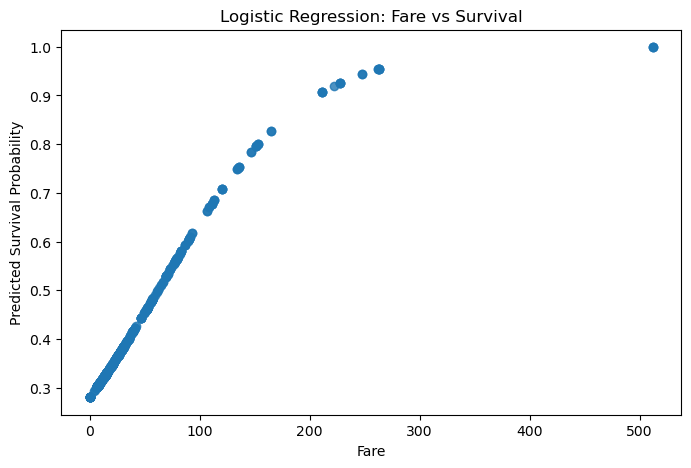

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

file_path1 = r"C:\Users\afren\Downloads\TitanicData(1).csv"
file_path2 = r"C:\Users\afren\Downloads\TitanicData(2).csv"

# load 
df1 = pd.read_csv(file_path1)
df2 = pd.read_csv(file_path2)

# merge/concat data
df = pd.concat([df1, df2], ignore_index=True)

# selects relevant columns and drops everything else
df = df[['Fare', 'Survived']].dropna()

# define variables
X = df[['Fare']]
y = df['Survived']

X_sm = sm.add_constant(X)

# fit model
logit_model = sm.Logit(y, X_sm)
result = logit_model.fit()

print(result.summary())

df['Survival_Prob'] = result.predict(X_sm)

# probability plot
plt.figure(figsize=(8, 5))
sns.regplot(x=df['Fare'], y=df['Survival_Prob'], logistic=True, ci=None)
plt.xlabel("Fare")
plt.ylabel("Predicted Survival Probability")
plt.title("Logistic Regression: Fare vs Survival")
plt.show()



In [ ]:
#Analysis: As you can see, there is a strong positive correlation between fare paid and survival probability
#P-Value: This tests for statistical significance and you can tell that since it is an incredibly small number, it shows us that our variables have a highly significant impact 

In [ ]:
Conclusion:
# My three research questions are designed to investigate who was the most likely to survive the titanic. Through the use of logistic regressions mainly on my binary (0,1) variables, I found that the most likely demographic to survive were women who had paid higher fares (wealthy women).

In [ ]:
#References:
courses.bowdoin.edu. (n.d.). Disproportionate Devastation. Titanic. Retrieved 3 17, 2025, from https://courses.bowdoin.edu/history-2203-fall-2020-kmoyniha/reflection/#:~:text=First%20class%20passengers%20had%20the,survived%20(Takis%2C%201999).

Yasser, M. (2022). Titanic Dataset. Kaggle. https://www.kaggle.com/datasets/yasserh/titanic-dataset?resource=download
